# 1. Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt

# 2. Thu thập dữ liệu

In [2]:
raw_df = pd.read_csv('./Data/DSPhongTro.csv', sep='\t')
raw_df.head()

,ID,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Link,Ngày đăng tin
0,39738459.0,"1155/51/20, Đường Tỉnh lộ 43, Phường Bình Chiể...",40.0,NaN,NaN,Không,2.8,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,21/10/2024
1,40588265.0,"Đường 3/2, Phường 11, Quận 10, Hồ Chí Minh",20.0,NaN,NaN,Không,4.0,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,18/10/2024
2,41251164.0,"Số 5/1, Đường Tống Văn Hên, Phường 15, Tân Bìn...",25.0,NaN,NaN,Không,4.5,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,18/10/2024
3,41278673.0,"Đường Cù Chính Lan, Phường 13, Tân Bình, Hồ Ch...",20.0,1.0,1.0,Đầy đủ.,4.0,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,22/10/2024
4,41290558.0,"Đường Ngô Bệ, Phường 13, Tân Bình, Hồ Chí Minh",60.0,2.0,2.0,Không,10.0,https://batdongsan.com.vn/cho-thue-nha-tro-pho...,23/10/2024


# 3. Tiền xử lý dữ liệu

## 3.1 Xử lý dòng bị thiếu

In [3]:
raw_df.isna().sum()

ID                  3
Địa chỉ             3
Diện tích           3
Số phòng ngủ     4114
Số toilet        3782
Nội thất            0
Mức giá            10
Link                0
Ngày đăng tin       3
dtype: int64

<Axes: >

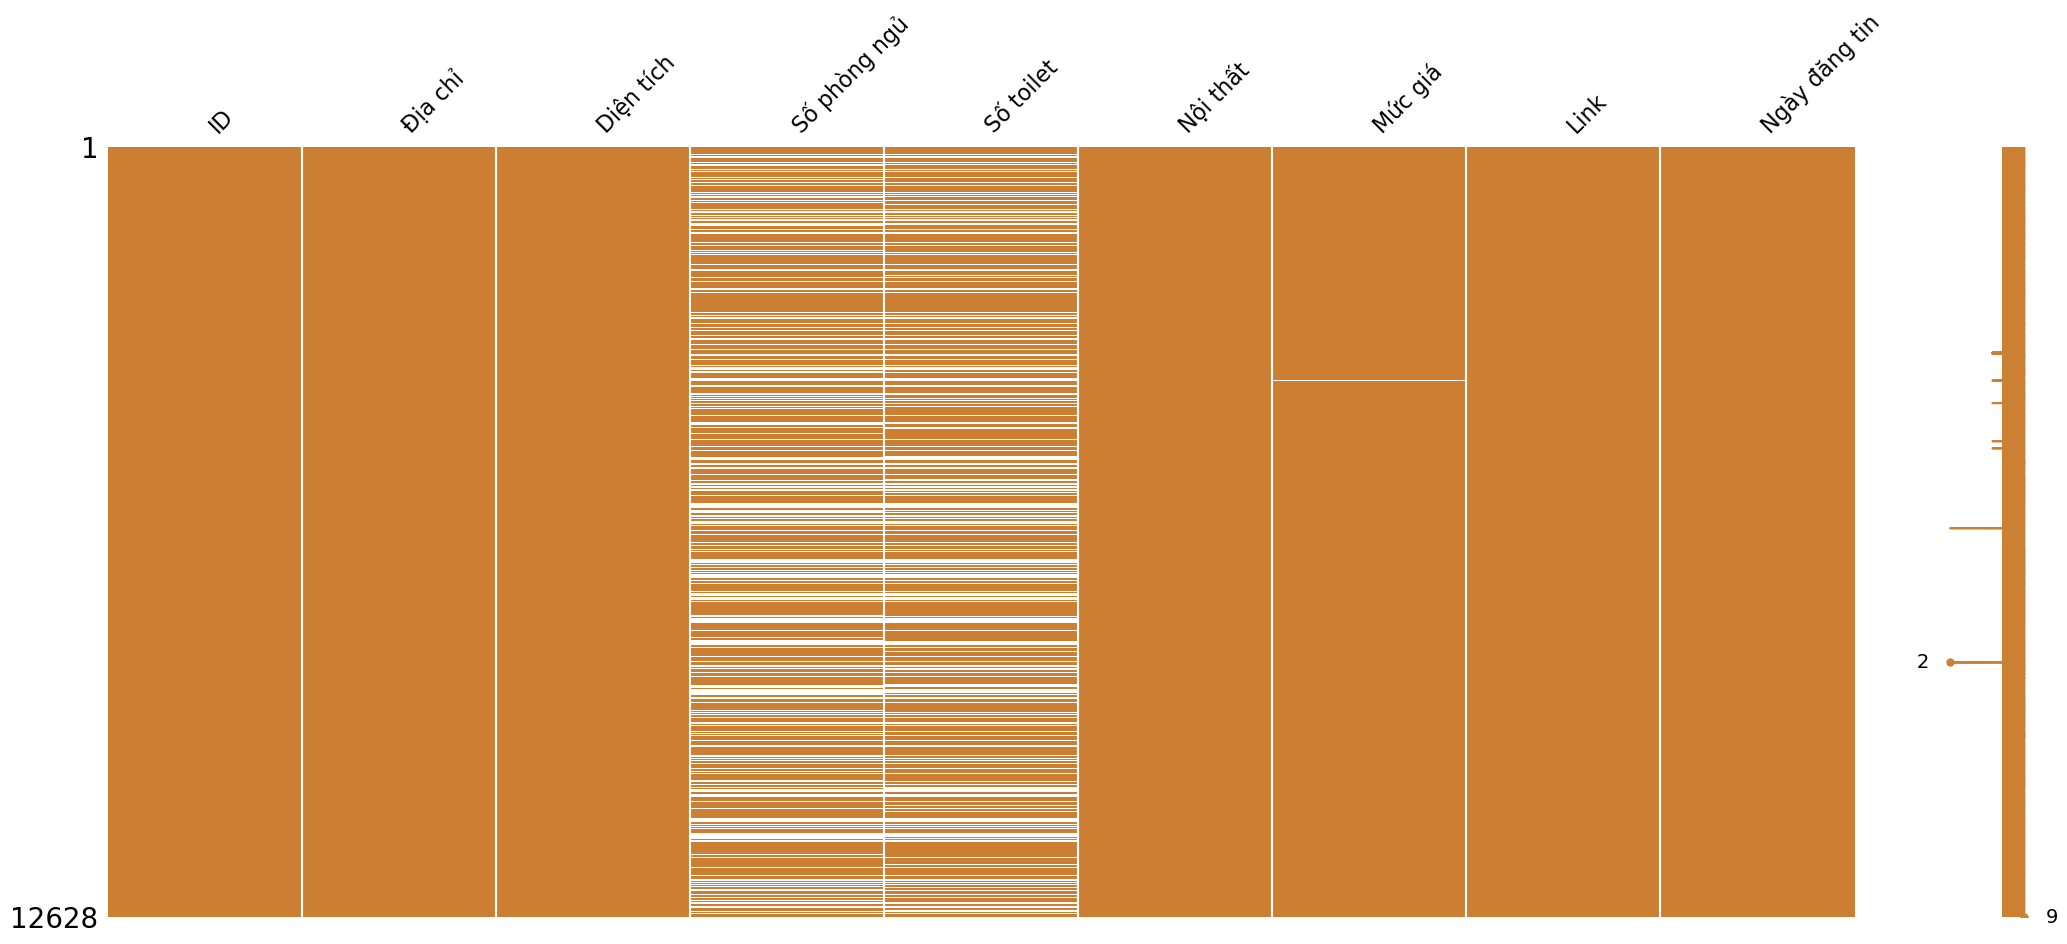

In [4]:
#Trực quan hóa dữ liệu bị thiếu
msno.matrix(raw_df, color=(0.8, 0.5, 0.2))

### Nhận xét

- Từ biểu đồ chúng ta có thể thấy 2 cột 'Số phòng ngủ' và 'Số toilet' có tỉ lệ thiếu dữ liệu khá lớn => Chúng ta sẽ loại bỏ các dòng bị thiếu dữ liệu để tránh việc nó ảnh hưởng đến kết quả phân tích sau này.
- Còn một số cột khác cũng bị thiếu dữ liệu nhưng rất ít => chúng ta cũng có thể bỏ những dòng này mà không sợ ảnh hưởng đến kết quả sau này.

In [5]:
raw_df = raw_df.dropna(subset=['ID', 'Địa chỉ', 'Diện tích', 'Mức giá', 'Ngày đăng tin', 'Số phòng ngủ', 'Số toilet'])

In [6]:
#Test
raw_df.isna().sum()

ID               0
Địa chỉ          0
Diện tích        0
Số phòng ngủ     0
Số toilet        0
Nội thất         0
Mức giá          0
Link             0
Ngày đăng tin    0
dtype: int64

## 3.2 Xử lý trùng lắp dữ liệu

In [7]:
#Test
print(f'Số lượng dòng dữ liệu bị trùng lặp: {raw_df.duplicated().sum()}')

Số lượng dòng dữ liệu bị trùng lặp: 3478


In [8]:
#Loại bỏ dòng trùng lắp
raw_df.drop_duplicates(inplace=True)

In [9]:
#Test
print(f'Số lượng dòng dữ liệu bị trùng lặp sau khi xử lý: {raw_df.duplicated().sum()}')

Số lượng dòng dữ liệu bị trùng lặp sau khi xử lý: 0


## 3.3 Loại bỏ các dòng có giá trị bất thường

In [10]:
raw_df.shape

(4839, 9)

In [11]:
raw_df.dtypes

ID               float64
Địa chỉ           object
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất          object
Mức giá           object
Link              object
Ngày đăng tin     object
dtype: object

- Chúng ta có thể thấy cột 'Mức giá' đáng lẽ ra phải có kiểu dữ liệu là float nhưng ở đây cột 'Mức giá' lại có kiểu object => Chúng ta cần kiểm tra các giá trị trong cột 'Mức giá'

In [12]:
#Kiểm tra các giá trị của cột mức giá
raw_df['Mức giá'].unique()

array(['4.0', '10.0', '7.3', '4.1', '2.8', '4.8', '3.4', '7.7', '4.5',
       '3.2', '3.6', '6.0', '3.5', '3.8', '8.5', '5.0', '4.4', '7.6',
       '3.7', '4.9', '5.4', '5.9', '6.5', '4.7', '2.5', '3.3', '7.0',
       '1.5', '1.2', '5.6', '5.8', '5.2', '9.5', '6.4', '3.0', '3.9',
       '3.45', '11.0', '5.5', '1.9', '8.0', '4.2', '6.6', '4.3', '7.2',
       '4.6', '7.5', '9.0', '6.8', '2.9', '2.6', '1.19', '1.09', '6.2',
       'Thỏa thuận', '2.7', '5.7', '5.1', '8.9', '6.7', '4.75', '6.9',
       '11.5', '5.3', '8.8', '13.0', '5.55', '6.3', '1.4', '3.95', '1.8',
       '1.65', '8.7', '8.3', '1.0', '2.2', '3.1', '7.4', '2.99', '13.5',
       '6.1', '16.0', '2.3', '9.2', '2.0', '7.8', '12.0', '7.9', '9.8',
       '1.95', '1.6', '10.5', '15.0', '4.95', '9.3', '1.32', '14.0',
       '1.7', '9.4', '10.9', '2.4', '11.3', '8.4', '2.1', '1.39', '4.45',
       '1.75', '1.35', '2.45', '8.6', '1.3', '9.9', '1.1', '3.55', '28.0',
       '8.49', '650.0', '12.2', '900.0', '1.15', '1.78', '18.0', '4

- Chúng ta có thể thấy có giá trị bất thường là  'Thỏa thuận' ở trong cột 'Mức giá' => bỏ những dòng có giá trị này

In [13]:
raw_df = raw_df[raw_df['Mức giá'] != 'Thỏa thuận'].reset_index(drop=True) #bỏ những dòng nào có giá là 'thỏa thuận'

In [14]:
#Test
raw_df['Mức giá'].unique()

array(['4.0', '10.0', '7.3', '4.1', '2.8', '4.8', '3.4', '7.7', '4.5',
       '3.2', '3.6', '6.0', '3.5', '3.8', '8.5', '5.0', '4.4', '7.6',
       '3.7', '4.9', '5.4', '5.9', '6.5', '4.7', '2.5', '3.3', '7.0',
       '1.5', '1.2', '5.6', '5.8', '5.2', '9.5', '6.4', '3.0', '3.9',
       '3.45', '11.0', '5.5', '1.9', '8.0', '4.2', '6.6', '4.3', '7.2',
       '4.6', '7.5', '9.0', '6.8', '2.9', '2.6', '1.19', '1.09', '6.2',
       '2.7', '5.7', '5.1', '8.9', '6.7', '4.75', '6.9', '11.5', '5.3',
       '8.8', '13.0', '5.55', '6.3', '1.4', '3.95', '1.8', '1.65', '8.7',
       '8.3', '1.0', '2.2', '3.1', '7.4', '2.99', '13.5', '6.1', '16.0',
       '2.3', '9.2', '2.0', '7.8', '12.0', '7.9', '9.8', '1.95', '1.6',
       '10.5', '15.0', '4.95', '9.3', '1.32', '14.0', '1.7', '9.4',
       '10.9', '2.4', '11.3', '8.4', '2.1', '1.39', '4.45', '1.75',
       '1.35', '2.45', '8.6', '1.3', '9.9', '1.1', '3.55', '28.0', '8.49',
       '650.0', '12.2', '900.0', '1.15', '1.78', '18.0', '4.99', '999.0',

## 3.4 Chuẩn hóa cột địa chỉ và nội thất

In [15]:
raw_df[['Địa chỉ', 'Nội thất']]

,Địa chỉ,Nội thất
0,"Đường Cù Chính Lan, Phường 13, Tân Bình, Hồ Ch...",Đầy đủ.
1,"Đường Ngô Bệ, Phường 13, Tân Bình, Hồ Chí Minh",Không
2,"Đường Nam Kỳ Khởi Nghĩa, Phường Võ Thị Sáu, Qu...",Không
3,"Đường Lê Văn Thịnh, Phường Bình Trưng Tây, Quậ...",Đầy đủ
4,"Đường Hiệp Bình, Phường Hiệp Bình Phước, Thủ Đ...",Không nội thất
...,...,...
4809,"Đường Thạnh Xuân 48, Phường Thạnh Xuân, Quận 1...",Không
4810,"Đường Đông Hưng Thuận 5, Phường Đông Hưng Thuậ...",Không
4811,"Đường Trần Hữu Trang, Phường 11, Phú Nhuận, Hồ...",Đầy đủ
4812,"Đường 339, Phường Phước Long B, Thủ Đức, Hồ Ch...",Đầy đủ


In [16]:
#chuyển địa chỉ thành số
def district_to_number(address, districts):
    for district, value in districts.items():
        if district in address:
            return value
    return 0

districts = pd.read_csv('./Data/address.txt', sep=':', header=None)
districts = districts.set_index(0)[1].to_dict()

raw_df['Địa chỉ'] = raw_df['Địa chỉ'].apply(lambda x: district_to_number(x, districts))

In [17]:
#chuyển nội thất thành số
def furniture_to_number(furniture, dict_furniture):
    for fur, value in dict_furniture.items():
        if fur.lower() in furniture.lower():
            return value
    return 2

dict_furniture = pd.read_csv('./Data/furniture.txt', sep=':', header=None).set_index(0)[1].to_dict()

raw_df['Nội thất'] = raw_df['Nội thất'].apply(lambda x: furniture_to_number(x, dict_furniture))

**Xử lý các dòng không có địa chỉ**

In [18]:
raw_df = raw_df[raw_df['Địa chỉ'] != 0]

In [19]:
#Test
raw_df[['Địa chỉ', 'Nội thất']]

,Địa chỉ,Nội thất
0,14,2
1,14,0
2,3,0
4,17,0
5,1,2
...,...,...
4809,1,0
4810,1,0
4811,13,2
4812,17,2


## 3.6 Xóa những cột không có ý nghĩa

- Ở đây, nhớm nhận thấy thuộc tính `Link` và `ID` không có ý nghĩa nhiều trong việc phân tích nên nhóm sẽ xóa 2 thuộc tính này

In [20]:
raw_df = raw_df.drop(['ID','Link'], axis=1)

#Loại bỏ dòng trùng lắp sau khi xóa cột
raw_df.drop_duplicates(inplace=True)

In [21]:
#Test
raw_df.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,14,20.0,1.0,1.0,2,4.0,22/10/2024
1,14,60.0,2.0,2.0,0,10.0,23/10/2024
2,3,45.0,1.0,1.0,0,7.3,23/10/2024
4,17,28.0,1.0,1.0,0,2.8,23/10/2024
5,1,30.0,1.0,1.0,2,4.8,23/10/2024


## 3.7 Chỉnh sửa kiểu dữ liệu cho từng cột

In [22]:
raw_df.dtypes

Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá           object
Ngày đăng tin     object
dtype: object

In [23]:
raw_df['Mức giá'] = raw_df['Mức giá'].astype(np.float64)
raw_df['Ngày đăng tin'] = pd.to_datetime(raw_df['Ngày đăng tin'], format='%d/%m/%Y')
raw_df['Địa chỉ'] = raw_df['Địa chỉ'].astype('category')
raw_df['Nội thất'] = raw_df['Nội thất'].astype('category')

In [24]:
#Test
raw_df.dtypes

Địa chỉ                category
Diện tích               float64
Số phòng ngủ            float64
Số toilet               float64
Nội thất               category
Mức giá                 float64
Ngày đăng tin    datetime64[ns]
dtype: object

## 3.8 Xử lý cột dữ liệu bất thường

### 3.8.1 Các giá trị bất thường về giá

<Axes: ylabel='Mức giá'>

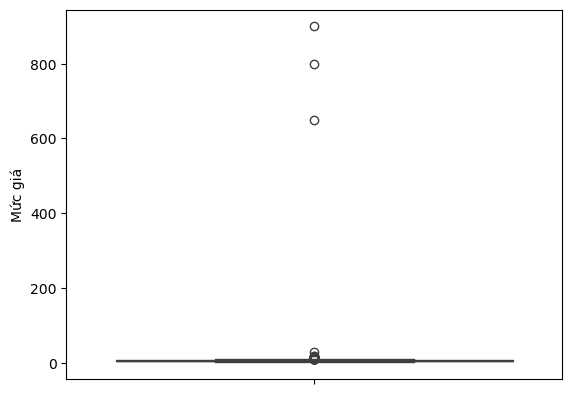

In [25]:
sns.boxplot(data=raw_df, y="Mức giá")

- Dựa vào biểu đồ, nhóm nhận thấy tồn tại những giá trị trên 600, gây ảnh hưởng nặng đến dữ liệu trong cột thuộc tính `Mức giá`.
- Và thật sự trong thực tế, mức giá trên 600 triệu để thuê một căn phòng trọ là hoàn toàn vô lý.

*=>* Vì vậy, nhóm quyết định chỉ sẽ giữ lại các giá trị dưới 600.

In [26]:
raw_df = raw_df[raw_df['Mức giá'] < 600]

<Axes: ylabel='Mức giá'>

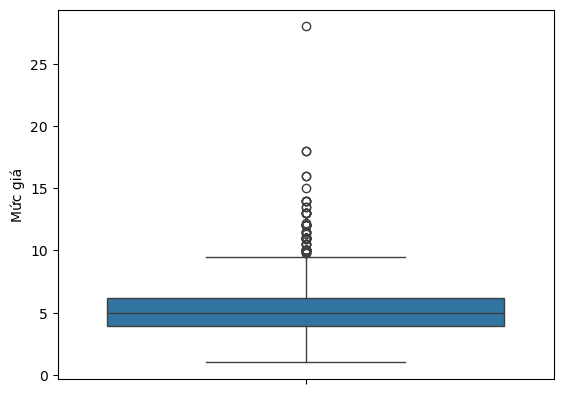

In [27]:
#Test
sns.boxplot(data=raw_df, y="Mức giá")

### 3.8.2 Các giá trị bất thường về số phòng ngủ

- Nhóm nhận thấy có một số phòng trọ có 3 phòng ngủ mà mức giá thấp hơn 5tr. Điều này là sai lệch dữ liệu, vì nhóm đã kiểm tra và đa số các căn như vậy là nhà nguyên căn và số toilet và số phòng là của cả căn trong khi giá thuê là của 1 phòng.

In [28]:
raw_df[(raw_df['Số phòng ngủ'] >= 3) & (raw_df['Mức giá'] < 5)]

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
8,14,24.0,5.0,1.0,0,4.5,2024-10-23
84,7,25.0,3.0,4.0,0,3.5,2024-10-20
401,16,30.0,3.0,3.0,0,1.8,2024-10-16
655,7,14.0,4.0,2.0,2,4.0,2024-10-22
1067,7,15.0,3.0,3.0,2,1.6,2024-09-27
2262,17,30.0,3.0,1.0,2,3.7,2024-10-10
2941,1,31.0,6.0,6.0,2,1.6,2024-10-15
3089,17,13.0,3.0,2.0,2,4.7,2024-11-28
3428,1,31.0,6.0,6.0,2,1.6,2024-12-02
3545,17,40.0,4.0,5.0,0,4.0,2024-11-25


In [29]:
raw_df = raw_df[~((raw_df['Số phòng ngủ'] >= 3) & (raw_df['Mức giá'] < 5))]

In [30]:
#Test
assert ((raw_df['Số phòng ngủ'] >= 3) & (raw_df['Mức giá'] < 5)).all() == False

### 3.8.3 Các giá trị bất thường về số phòng trọ trong một quận

In [31]:
count_per_address = raw_df['Địa chỉ'].value_counts().sort_index()
count_per_address.index = ['Quận 1', 'Bình Thạnh','Quận 3','Quận 4','Quận 5','Quận 6','Quận 7','Quận 8','Gò Vấp','Phú Nhuận',
                           'Tân Bình','Tân Phú','Bình Tân', 'Thủ Đức','Bình Chánh','Cần Giờ','Hóc Môn','Nhà Bè']
count_per_address

Quận 1        645
Bình Thạnh    629
Quận 3        234
Quận 4         71
Quận 5         96
Quận 6         53
Quận 7        382
Quận 8        166
Gò Vấp        354
Phú Nhuận     243
Tân Bình      474
Tân Phú       255
Bình Tân      161
Thủ Đức       154
Bình Chánh     71
Cần Giờ         2
Hóc Môn        12
Nhà Bè         36
Name: Địa chỉ, dtype: int64

- Xoá các địa chỉ có ít hơn 10 phòng trọ, cụ thể là Cần Giờ. 

In [32]:
raw_df = raw_df[raw_df['Địa chỉ'] != 19]

In [33]:
#Test
assert ((raw_df['Địa chỉ'] == 19).all()) == False

## 3.8 Lưu dữ liệu đã được xử lý

In [34]:
#Lưu dữ liệu đã xử lý vào file csv
raw_df.to_csv('./Data/DSPhongTro_DaXuLy.csv', encoding='utf-8-sig', header=True, sep='\t', index=False)

# 4. Khám phá dữ liệu

## 4.1 Lấy dữ liệu 

In [35]:
df = pd.read_csv('./Data/DSPhongTro_DaXuLy.csv',sep='\t')
df.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,14,20.0,1.0,1.0,2,4.0,2024-10-22
1,14,60.0,2.0,2.0,0,10.0,2024-10-23
2,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,17,28.0,1.0,1.0,0,2.8,2024-10-23
4,1,30.0,1.0,1.0,2,4.8,2024-10-23


## 4.2 Cấu trúc tập dữ liệu

In [36]:
n_rows, n_cols = df.shape
print("Số dòng: ", n_rows)
print("Số cột: ", n_cols)

Số dòng:  4036
Số cột:  7


## 4.3 Khám phá các dòng dữ liệu

### 4.3.1 Lấy ngẫu nhiên 1 dòng dữ liệu

In [37]:
df.sample()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
2502,14,40.0,1.0,1.0,0,7.5,2024-10-12


### 4.3.2 Ý nghĩa của từng dòng dữ liệu

Mỗi dòng trong tập dữ liệu cung cấp thông tin chi tiết của từng phòng trọ cho thuê được đăng bài vào tháng 9, 10, 11 và 12/2024 trên trang web và tập trung chủ yếu vào tháng 10 và tháng 11. Mỗi dòng có ý nghĩa rất quan trọng trong việc thực hiện phân tích giá phòng trọ và dự đoán xu hướng giá cả trong tương lai của nhóm.

### 4.3.3 Có dòng nào bị trùng lắp dữ liệu không?

In [38]:
have_duplicated_rows = df.duplicated().any()

In [39]:
if have_duplicated_rows:
    print("Dữ liệu tồn tại dòng bị trùng lắp cần tiền xử lý lại")
else:
    print("Không có dòng dữ liệu nào bị trùng lắp cả")

Không có dòng dữ liệu nào bị trùng lắp cả


## 4.4 Khám phá các cột dữ liệu

### 4.4.1 Các cột dữ liệu

In [40]:
df.columns

Index(['Địa chỉ', 'Diện tích', 'Số phòng ngủ', 'Số toilet', 'Nội thất',
       'Mức giá', 'Ngày đăng tin'],
      dtype='object')

### 4.4.2 Ý nghĩa của mỗi cột dữ liệu

#### Ý nghĩa

- `Địa chỉ`: Vị trí quận nơi căn phòng được cho thuê (mã hóa số).
- `Diện tích`: Kích thước phòng (m²).
- `Số phòng ngủ`: Phòng trọ có bao nhiêu phòng ngủ.
- `Số toilet`: Phòng trọ có bao nhiêu phòng vệ sinh.
- `Nội thất`: Tình trạng nội thất trong phòng (không có, cơ bản, đầy đủ, cao cấp).
- `Mức giá`: Giá thuê phòng trọ theo triệu đồng/tháng.
- `Ngày đăng tin`: Ngày bài đăng xuất hiện, cung cấp thông tin về thời gian đăng tải.

#### Bảng phân loại

| **Thuộc tính**        | **Giá trị số/Giá trị phân loại** | **Liên tục/Rời rạc** | **Thứ tự/Không có thứ tự** |
|-----------------------|----------------------------------|----------------------|----------------------------|
| **Địa chỉ**          | Giá trị phân loại               | Rời rạc             | Không có thứ tự           |
| **Diện tích**        | Giá trị số                      | Liên tục            | Không có thứ tự           |
| **Số phòng ngủ**     | Giá trị số                      | Rời rạc             | Có thứ tự                 |
| **Số toilet**        | Giá trị số                      | Rời rạc             | Có thứ tự                 |
| **Nội thất**         | Giá trị phân loại               | Rời rạc             | Có thứ tự                 |
| **Mức giá**          | Giá trị số                      | Liên tục            | Không có thứ tự           |
| **Ngày đăng tin**    | Giá trị phân loại               | Rời rạc             | Không có thứ tự           |


### 4.4.3 Kiểu dữ liệu hiện tại của từng cột

In [41]:
df.dtypes

Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá          float64
Ngày đăng tin     object
dtype: object

### 4.4.4 Ý nghĩa của một số cột dữ liệu đã mã hóa

#### Địa chỉ

In [42]:
info_area = pd.read_csv('./Data/address.txt',header=None,sep=':')
info_area.columns= ['Địa chỉ','Mã']
info_area

,Địa chỉ,Mã
0,Quận 1,1
1,Quận 3,3
2,Quận 4,4
3,Quận 5,5
4,Quận 6,6
5,Quận 7,7
6,Quận 8,8
7,Quận 10,10
8,Quận 11,11
9,Quận 12,12


#### Nội thất

In [43]:
info_furniture = pd.read_csv('./Data/furniture.txt',header=None,sep=':')
info_furniture.columns= ['Nội thất','Mã']
info_furniture

,Nội thất,Mã
0,Không,0
1,Cơ bản,1
2,Đầy đủ,2
3,Cao cấp,3


### 4.4.5 Phân bố của các cột dữ liệu số

Với mỗi cột dữ liệu số ta sẽ tính:

- `mising_rato`: tỷ lệ phần trăm (từ 0 đến 100) của giá trị bị thiếu
- `min`: giá trị nhỏ nhất
- `lower_quartile`: giá trị tứ phân vị thứ nhất (25%)
- `median`: giá trị tứ phân vị thứ hai (50%)
- `upper_quartile`: giá trị tứ phân vị thứ ba (75%)
- `min`: giá trị nhỏ nhất

In [44]:
def missing_ratio(col):
    return (col.isna().mean()*100).round(1)

def lower_quartile(col):
    return col.quantile(0.25).round(1)

def median(col):
    return col.quantile(0.5).round(1)

def upper_quartile(col):
    return col.quantile(0.75).round(1)

#Lấy ra các cột dữ liệu số
num_cols = df[['Diện tích','Số phòng ngủ','Số toilet','Mức giá']].copy()

#Tính toán các thông sô
num_cols_info = num_cols.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_cols_info

,Diện tích,Số phòng ngủ,Số toilet,Mức giá
missing_ratio,0.0,0.0,0.0,0.0
min,2.0,1.0,1.0,1.0
lower_quartile,25.0,1.0,1.0,3.9
median,30.0,1.0,1.0,5.0
upper_quartile,35.0,1.0,1.0,6.2
max,100.0,4.0,5.0,28.0


### 4.4.6 Phân bố của các cột dữ liệu phân loại

Đối với các cột có kiểu dữ liệu không phải số nhóm sẽ tính:

- `missing_ratio`: tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu.
- `num_values`: số lượng giá trị (các giá trị ở đây là các giá trị khác nhau).
- `value_ratios`: tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần (không xét giá trị thiếu, tỷ lệ là tỷ lệ so với số giá trị không thiếu).

**Chú thích:**
- Ở giá trị `value_ratios` của thuộc tính `Ngày đăng tin` vì có quá nhiều giá trị nên sẽ quy đổi về dạng `tháng`-`năm` để tính tỉ lệ tránh hiển thị quá nhiều.

In [45]:
def num_values(col):
    return len(col.dropna().unique())

def value_ratios(col):
    if col.name == 'Ngày đăng tin':
        col = col.str[:7]
    return col.value_counts(normalize=True).mul(100).round(1).to_dict()
    
pd.set_option('display.max_colwidth', None)

#Lấy ra các cột dữ liệu phân loại
cat_cols = df[['Địa chỉ','Nội thất','Ngày đăng tin']].copy()

#Tính toán các thông số
cat_cols_info = cat_cols.agg([missing_ratio, num_values, value_ratios])

cat_cols_info 

,Địa chỉ,Nội thất,Ngày đăng tin
missing_ratio,0.0,0.0,0.0
num_values,17,4,67
value_ratios,"{1: 16.0, 2: 15.6, 14: 11.7, 7: 9.5, 9: 8.8, 15: 6.3, 13: 6.0, 3: 5.8, 8: 4.1, 16: 4.0, 17: 3.8, 5: 2.4, 4: 1.8, 18: 1.8, 6: 1.3, 22: 0.9, 21: 0.3}","{2: 63.1, 0: 24.7, 1: 11.8, 3: 0.4}","{'2024-10': 50.1, '2024-11': 27.4, '2024-09': 12.8, '2024-12': 9.7}"


# 5. Trực qua hóa và phân tích dữ liệu

## 5.1 Phân tích cơ bản

### Phân bố của các giá trị số rời rạc

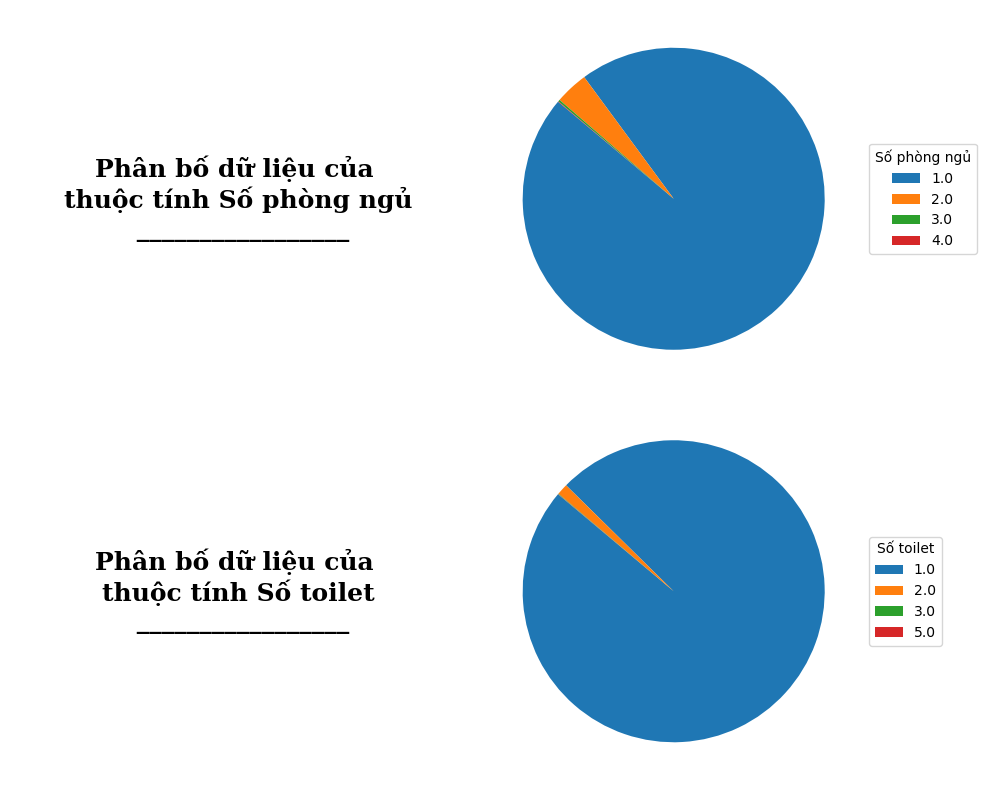

In [46]:
#Số phòng ngủ, Số toilet
num_discrete_cols = ['Số phòng ngủ', 'Số toilet']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(num_discrete_cols):
    axes[i, 0].spines["bottom"].set_visible(False)
    axes[i, 0].spines["left"].set_visible(False)
    axes[i, 0].spines["top"].set_visible(False)
    axes[i, 0].spines["right"].set_visible(False)
    axes[i, 0].tick_params(left=False, bottom=False)
    axes[i, 0].set_xticklabels([])
    axes[i, 0].set_yticklabels([])
    axes[i, 0].text(0.5, 0.5,
                f'Phân bố dữ liệu của \nthuộc tính {col}\n _________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=18, fontweight='bold',
                fontfamily='serif',
                color="#000000")
    
    count = df[col].value_counts()
    wedges, texts = axes[i, 1].pie(count.values, startangle=140)
    axes[i, 1].legend(wedges, [f"{label}" for label in count.index],
                      title=col, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

#### Nhận xét

- Đối với phân bố dữ liệu của thuộc tính **Số phòng ngủ**:
    - Tần suất lớn nhất là 1 phòng ngủ, chiếm áp đảo so với các giá trị khác.
    - Các giá trị khác từ 2 trở đi xuất hiện rất ít.
- Đối với phân bố dữ liệu của thuộc tính **Số toilet**:
    - Tần suất lớn nhất là 1 toilet, chiếm áp đảo so với các giá trị khác.
    - Các giá trị khác từ 2 trở đi xuất hiện rất ít.

Điều này cho thấy các phòng trọ có từ 2 phòng ngủ và 2 toilet trở lên là rất hiếm, dữ liệu có sự mất cân đối nghiêm trọng. Cần xem xét lại các thuộc tính này trong việc sử dụng mô hình học máy vì dữ liệu lệch quá nhiều, có thể ảnh hưởng đến kết quả dự đoán.

### Phân bố các giá trị số liên tục

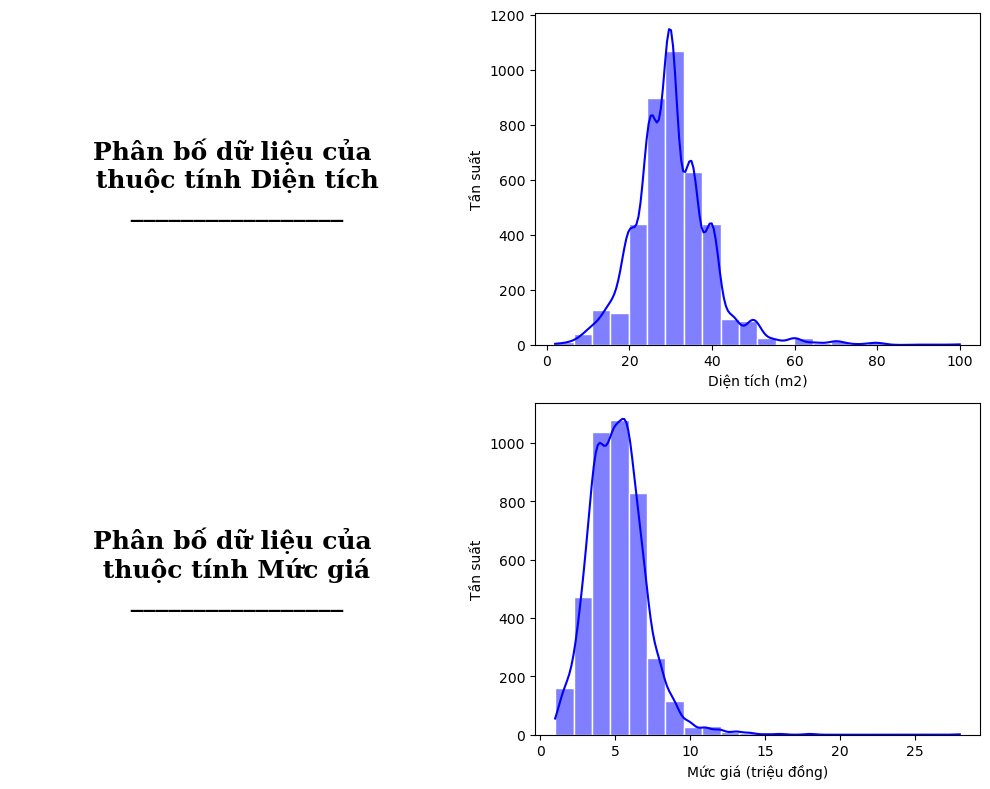

In [47]:
#Số phòng ngủ, Số toilet
num_continous_cols = ['Diện tích', 'Mức giá']
label = ['Diện tích (m2)','Mức giá (triệu đồng)']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(num_continous_cols):
    axes[i, 0].spines["bottom"].set_visible(False)
    axes[i, 0].spines["left"].set_visible(False)
    axes[i, 0].spines["top"].set_visible(False)
    axes[i, 0].spines["right"].set_visible(False)
    axes[i, 0].tick_params(left=False, bottom=False)
    axes[i, 0].set_xticklabels([])
    axes[i, 0].set_yticklabels([])
    axes[i, 0].text(0.5, 0.5,
                f'Phân bố dữ liệu của\n thuộc tính {col}\n _________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=18, fontweight='bold',
                fontfamily='serif',
                color="#000000")
    sns.histplot(data=df,x=col, kde=True, ax=axes[i, 1], color='blue',bins=22,edgecolor='white')
    axes[i,1].set_ylabel('Tần suất')
    axes[i,1].set_xlabel(label[i])

plt.tight_layout()
plt.show()

#### Nhận xét

- Đối với biểu đồ phân bố dữ liệu của thuộc tính **Diện tích**:
    - Diện tích rơi vào khoảng từ 10 đến 50m2, với đỉnh phân phối khoảng 30m2, cho thấy đây là mức diện tích phổ biến của nhà trọ cho thuê trong tập dữ liệu.
    - Phần đuôi từ mức diện tích 50m2 trở đi kéo dài cho thấy tồn tại các giá trị ngoại lai. Điều này thể hiện sự mất cân đối của biểu đồ.
- Đối với biểu đồ phân bố dữ liệu của thuộc tính **Mức giá**:
    - Mức giá rơi vào khoảng 3 đến 7 triệu đồng, với đỉnh phân phối khoảng 5 triệu đồng, cho thấy đây là giá tiền phổ biến của nhà trọ cho thuê trong tập dữ liệu.
    - Phần đuôi từ mức 10 triệu đồng trở đi kéo dài cho thấy tồn tại các giá trị ngoại lại. Điều này thể hiện sự mất cân đối của biểu đồ.

Nhìn chung cả hai biểu đồ đều cho thấy tồn tại các giá trị ngoại lai, để phục vụ cho việc áp dụng mô hình học máy để dự đoán thì các dữ liệu này nên cần được xử lý.

### Phân bố của các giá trị phân loại

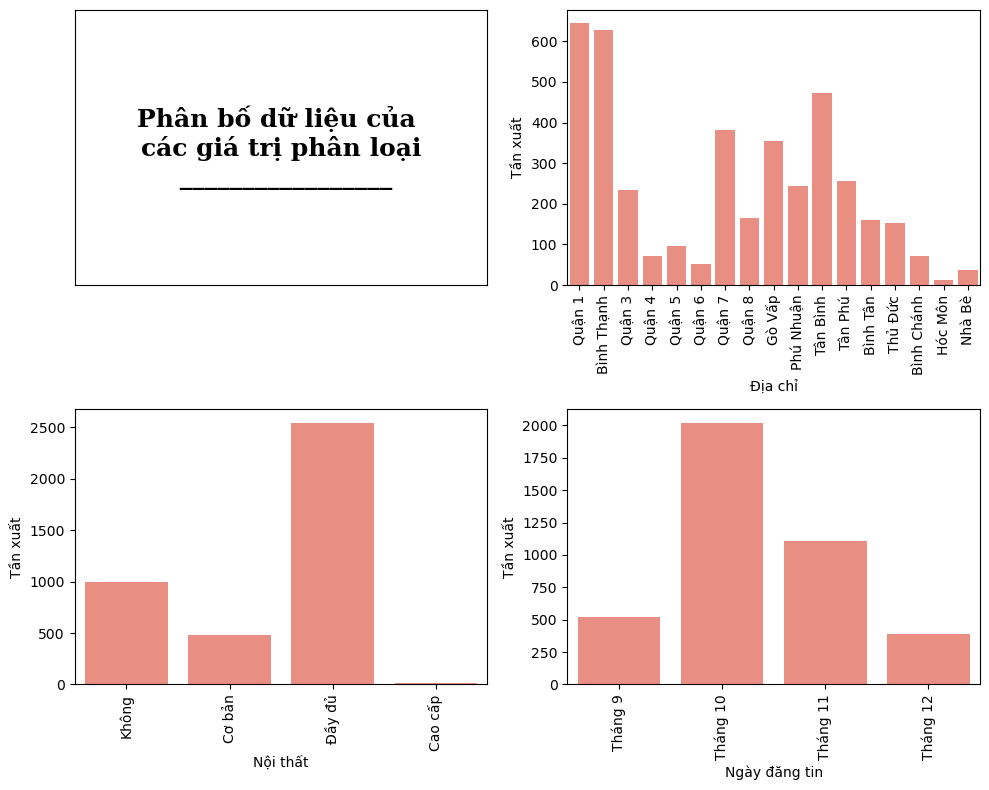

In [48]:
#'Địa chỉ','Nội thất','Ngày đăng tin'
cate_cols = ['Địa chỉ','Nội thất','Ngày đăng tin']
tmp_df = df.copy()
tmp_df['Ngày đăng tin'] = tmp_df['Ngày đăng tin'].str[:7]

label = [['Quận 1', 'Bình Thạnh','Quận 3','Quận 4','Quận 5','Quận 6','Quận 7','Quận 8','Gò Vấp','Phú Nhuận','Tân Bình','Tân Phú','Bình Tân',
         'Thủ Đức','Bình Chánh','Hóc Môn','Nhà Bè'],
         ['Không', 'Cơ bản', 'Đầy đủ','Cao cấp'],
         ['Tháng 9','Tháng 10','Tháng 11','Tháng 12']]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].tick_params(left=False, bottom=False)
axes[0, 0].set_xticklabels([])
axes[0, 0].set_yticklabels([])
axes[0, 0].text(0.5, 0.5,
            f'Phân bố dữ liệu của \ncác giá trị phân loại\n _________________',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold',
            fontfamily='serif',
            color="#000000")


for i, col in enumerate(cate_cols):
    r = (i + 1) // 2
    c = (i + 1) % 2
    
    count = tmp_df[col].value_counts().sort_index()
    sns.barplot(x=count.index, y=count.values,ax=axes[r,c], color='salmon')
    axes[r,c].set_ylabel('Tần xuất')
    axes[r, c].set_xlabel(col)
    axes[r, c].set_xticks(range(len(count.index)))
    axes[r, c].set_xticklabels(label[i], rotation=90)

plt.tight_layout()
plt.show()

#### Nhận xét

- Đối với phân bố dữ liệu của thuộc tính **Địa chỉ**:
    - Các địa chỉ Quận 1 và Bình Thạnh có số lượng phòng trọ nhiều nhất với tần xuất gần 700 có thể là do đặc điểm kinh tế - xã hội hoặc nhu cầu thuê trọ cao tại đây.
    - Ngược lại, một số địa chỉ như Hóc Môn và Nhà Bè có số lượng rất thấp, cho thấy sự chênh lệch đáng kể về mức độ cung cấp nhà cho thuê.
    - Các địa chỉ có tần xuất cao thứ hai có thể kể đến như quận 7,Gò Vấp và Tân Bình.
- Đối với phân bố dữ liệu của thuộc tính **Nội thất**:
    - Tần xuất của nội Đầy đủ chiếm cao nhất và có phần áp đảo với trên 2500, cho thấy xu hướng trang bị nội thất đầy đủ ở các phòng trọ cho thuê là nhiều nhất trong tập dữ liệu.
    - Tần xuất của nội thất Không và Cơ bản chiểm lần lượt là 1000 và 500.
    - Thấp nhất là tần xuất của nội thất Cao cấp cho thấy các chủ trọ thường không quá tập trung vào việc trang bị nội thất cao cấp cho các phòng trọ.
- Đối với phân bố dữ liệu của thuộc tính **Ngày đăng tin**:
    - Tháng 10 là tháng được đăng tin tìm kiếm phòng trọ nhiều nhất trong tập dữ liệu này với tần xuất trên 2000, cao hơn rất nhiều so với các tháng còn lại.
    - Tháng 9 và tháng 12 là tháng có tần xuất đăng tin ít nhất khi đạt tần xuất khoảng 500 và dưới 500.